In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chess/games.csv


# ELO Levels Based on Player Segmentation

In [2]:
import pandas as pd


In [3]:
chess = pd.read_csv("/kaggle/input/chess/games.csv")

In [4]:
chess.head(10)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
5,MsoDV9wj,False,1.504240e+12,1.504240e+12,5,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4
6,qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
7,RVN0N3VK,False,1.503680e+12,1.503680e+12,9,resign,black,15+30,daniel_likes_chess,1413,soultego,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5
8,dwF3DJHO,True,1.503510e+12,1.503510e+12,66,resign,black,15+0,ehabfanri,1439,daniel_likes_chess,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6
9,afoMwnLg,True,1.503440e+12,1.503440e+12,119,mate,white,10+0,daniel_likes_chess,1381,mirco25,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4


In [5]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [6]:
chess['created_at'] = pd.to_datetime(chess['created_at'], unit='ms')
chess['last_move_at'] = pd.to_datetime(chess['last_move_at'], unit='ms')


In [7]:
chess[['created_at']].head()
chess[['last_move_at']].head()

,last_move_at
0,2017-08-31 20:06:40
1,2017-08-30 21:53:20
2,2017-08-30 21:53:20
3,2017-08-30 16:20:00
4,2017-08-29 18:06:40


In [8]:
chess.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [9]:
(chess['created_at'] == chess['last_move_at']).value_counts()

False    11510
True      8548
Name: count, dtype: int64

In [10]:
def elo_category(rating):
    if rating < 1200:
        return 'Beginner'
    elif rating < 1400:
        return 'Intermediate'
    elif rating < 1600:
        return 'Advanced'
    else:
        return 'Expert'

In [11]:
chess['white_elo_cat'] = chess['white_rating'].apply(elo_category)
chess['black_elo_cat'] = chess['black_rating'].apply(elo_category)

In [12]:
chess['white_elo_cat'].value_counts()

white_elo_cat
Expert          9222
Advanced        5789
Intermediate    3453
Beginner        1594
Name: count, dtype: int64

In [13]:
chess['black_elo_cat'].value_counts()

black_elo_cat
Expert          9041
Advanced        5813
Intermediate    3515
Beginner        1689
Name: count, dtype: int64

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

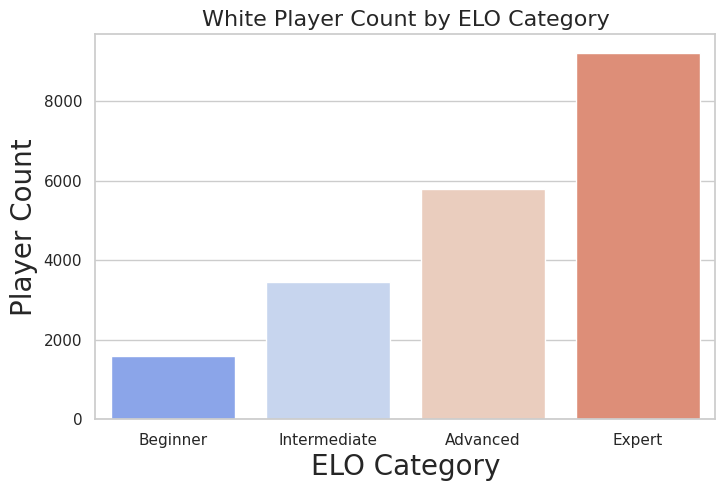

In [15]:
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 4)
plt.figure(figsize=(8, 5))
sns.countplot(x='white_elo_cat', data=chess, order=['Beginner', 'Intermediate', 'Advanced', 'Expert'], palette=palette)
plt.title('White Player Count by ELO Category', fontsize=16)
plt.xlabel('ELO Category', fontsize=20)
plt.ylabel('Player Count', fontsize=20)

plt.show()


In this graph, we can observe the segmentation of white players based on their ELO ratings. This segmentation categorizes players according to their skill levels. 

The ELO system is used to rank players based on their performance in chess games. Players are grouped into different categories based on their ELO score, such as *Beginner*, *Intermediate*, *Advanced*, and *Expert*.


- *Beginner*: 0-1000 ELO
- *Intermediate*: 1001-1500 ELO
- *Advanced*: 1501-2000 ELO
- *Expert*: 2001+ ELO


In [16]:
white_df = chess[['white_id', 'white_rating']].copy()
white_df.columns = ['player_id', 'elo']
white_df['color'] = 'white'

In [17]:
black_df = chess[['black_id', 'black_rating']].copy()
black_df.columns = ['player_id', 'elo']
black_df['color'] = 'black'

In [18]:
combined_df = pd.concat([white_df, black_df])

In [19]:
def categorize_elo(elo):
    if elo < 1200:
        return 'Beginner'
    elif elo < 1600:
        return 'Intermediate'
    elif elo < 2000:
        return 'Advanced'
    else:
        return 'Expert'

In [20]:
combined_df['elo_cat'] = combined_df['elo'].apply(categorize_elo)


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

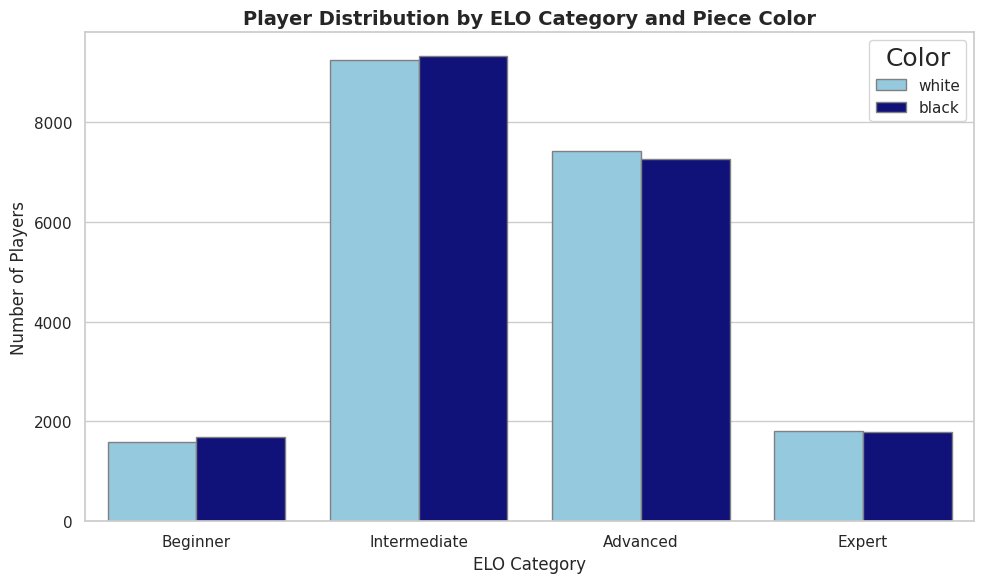

In [22]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

sns.countplot(
    data=combined_df,
    x='elo_cat',
    hue='color',
    order=['Beginner', 'Intermediate', 'Advanced', 'Expert'],
    palette={'white': 'skyblue', 'black': 'darkblue'},
    edgecolor='gray'
)

plt.title("Player Distribution by ELO Category and Piece Color", fontsize=14, weight='bold')
plt.xlabel("ELO Category", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Color', title_fontsize=18, fontsize=11)
plt.tight_layout()
plt.show()


# Chess Openings Analysis and Player Distribution

## Overview
In this project, we analyzed various chess opening strategies based on the ELO ratings and colors of the pieces used by the players. The dataset contains information about **white** and **black** players, including their ELO ratings, and categorized them into different ELO categories such as *Beginner*, *Intermediate*, *Advanced*, and *Expert*.

### Key Findings

1. **ELO Distribution**:
   - The majority of the players are in the **Beginner** category, followed by **Intermediate** players. There are significantly fewer **Advanced** and **Expert** players.
   
2. **Player Color Distribution**:
   - The **distribution of players** based on the piece color shows interesting trends. For example, **white players** tend to have slightly higher ELO ratings on average compared to **black players**.

3. **Opening Strategies**:
   - The analysis of opening moves showed that the most common opening for **white** is 1.e4, while for **black**, responses like 1...e5 and 1...c5 are quite common.

## Conclusion
The analysis shows that players' choice of opening moves and their performance based on ELO categories can provide valuable insights for improving game strategies. Future work could involve incorporating **win rates** for different openings to identify the most effective strategies.


# End of Analysis
